In [4]:
import tensorflow as tf
#model_cytoplasm = tf.keras.models.load_model('UNET_cytoplasm.h5')
#model_condensate = tf.keras.models.load_model('UNET_condensate.h5')
model_3cat = tf.keras.models.load_model('UNET_3Cat.h5')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import tifffile as tif

# Assuming you have test images in a directory, similar to how you handled training data
folder = '/media/hcleroy/experimental_data/Synphilin_Timelapse/'
test_image_paths = [folder+'Cell'+str(i)+'_ROI'+str(i)+'.tif' for i in range(1,9)]  # Add your test image paths here


In [3]:
# Preprocess test images
test_images = [tif.imread(path) for path in test_image_paths]
test_images = [tf.image.resize(img[25,12, :,:, np.newaxis], (256, 256)) for img in test_images]
#test_images = np.array([ img for imgs in test_images for img in imgs], dtype=np.float32)
test_images = np.array([ img for img in test_images], dtype=np.float32)
test_images /= 255.0  # Normalize pixel values to [0, 1]

In [5]:
# Make predictions
#predictions_cytoplasm = model_cytoplasm.predict(test_images)
#predictions_condensate = model_condensate.predict(np.log(test_images))
predictions = model_3cat.predict(test_images)

2024-06-18 17:45:31.456103: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-18 17:45:31.534346: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-18 17:45:33.793304: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-18 17:45:34.342576: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-18 17:45:34.585655: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.


1/1 [==============================] - 4s 4s/step


In [11]:
threshold = 0.5
cyt_mask = np.array([pred>threshold for pred in predictions_cytoplasm])

In [18]:
predictions[0][:,:,0]

array([[0.6173607 , 0.7238299 , 0.7455353 , ..., 0.74974686, 0.68815523,
        0.5254195 ],
       [0.78143734, 0.89551127, 0.92031926, ..., 0.9143893 , 0.8698597 ,
        0.6915529 ],
       [0.82692766, 0.9347305 , 0.9487773 , ..., 0.9453836 , 0.90760726,
        0.7444208 ],
       ...,
       [0.86236715, 0.9538368 , 0.96701205, ..., 0.99632007, 0.99094415,
        0.92846864],
       [0.8469457 , 0.9506951 , 0.96424437, ..., 0.99578583, 0.9890374 ,
        0.9204919 ],
       [0.6874335 , 0.8540347 , 0.8892221 , ..., 0.9728334 , 0.9496252 ,
        0.81741184]], dtype=float32)

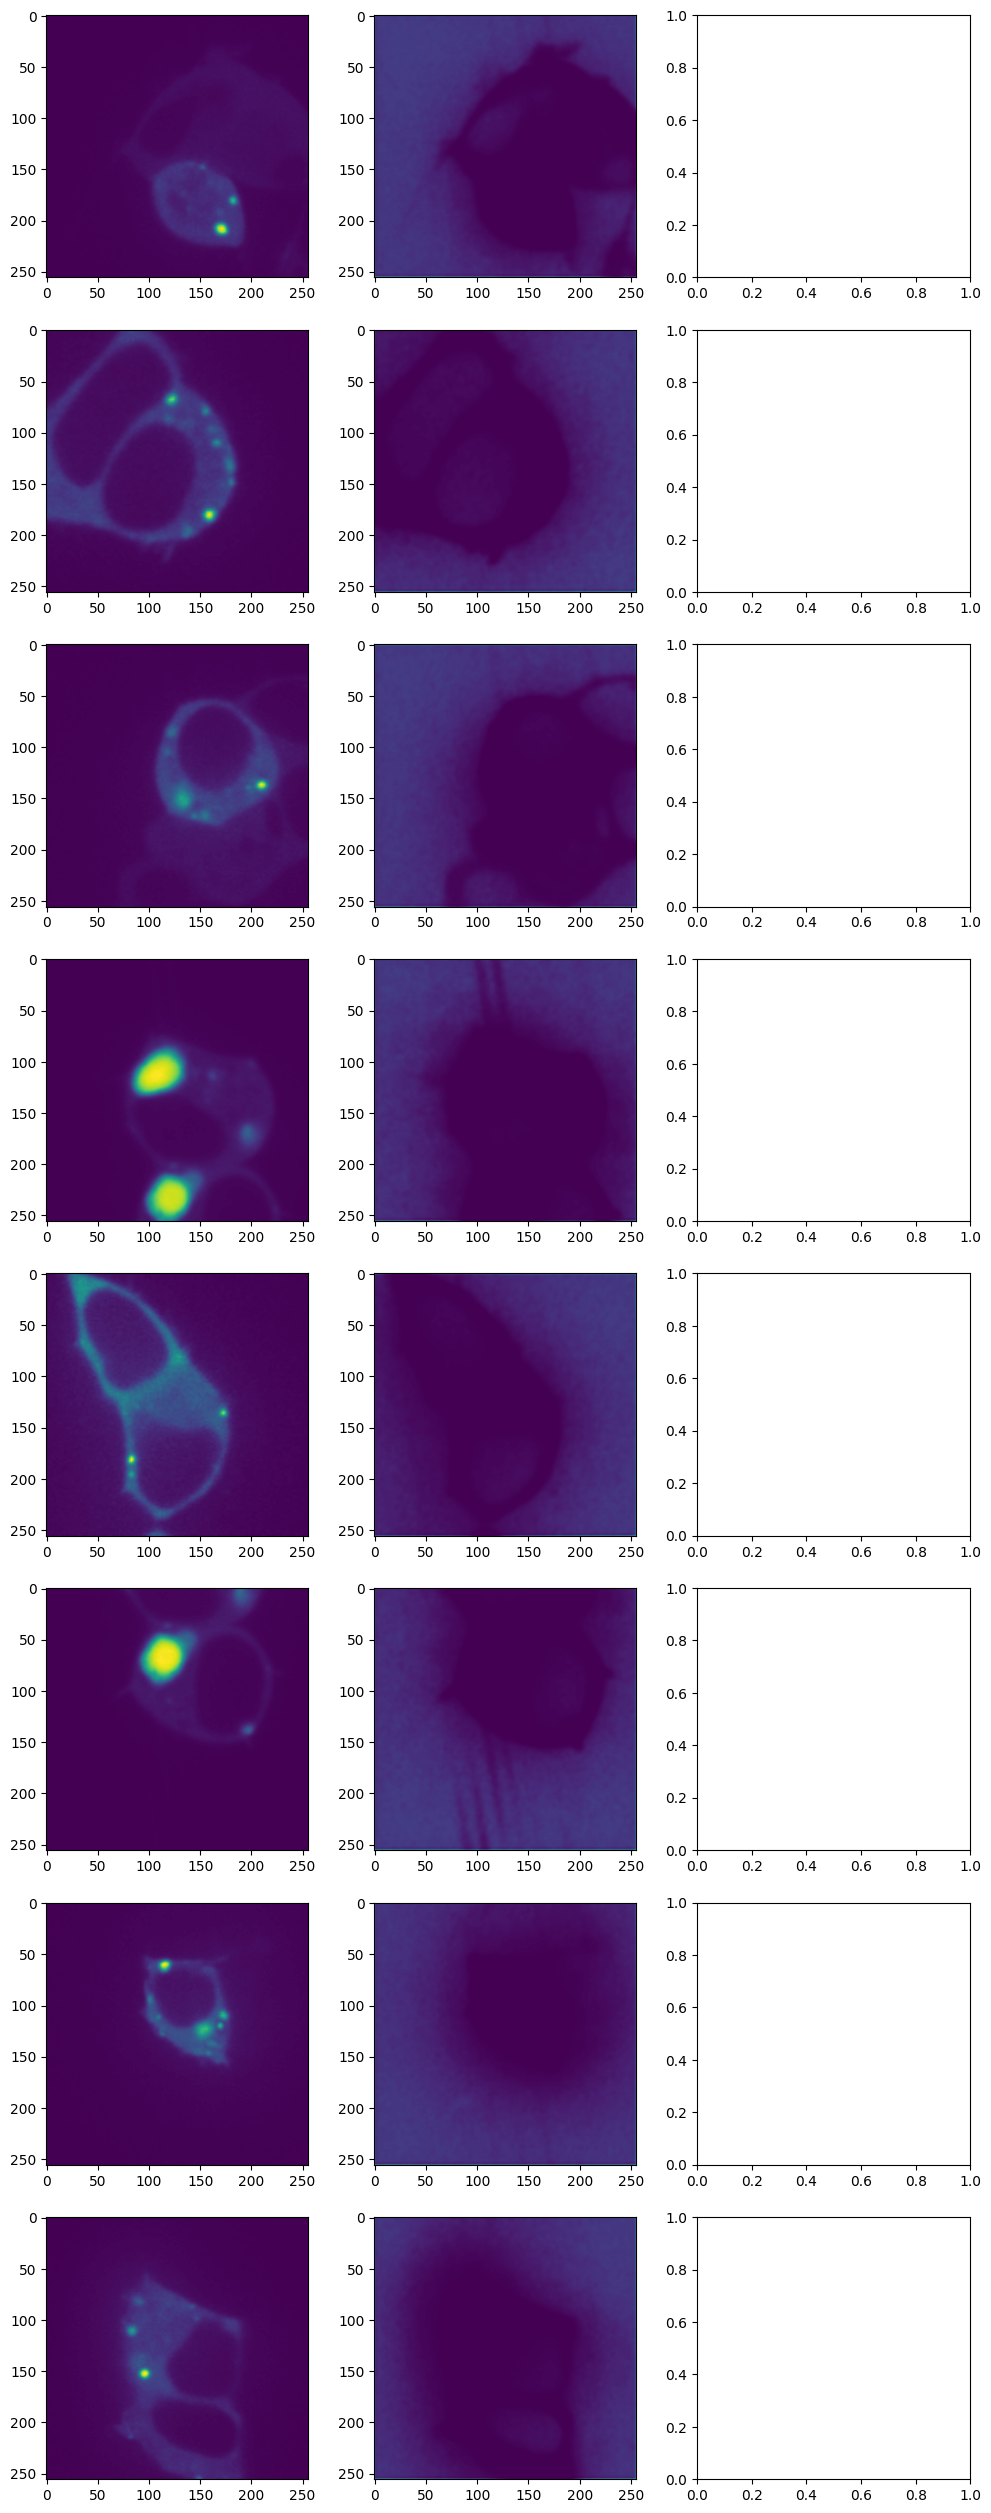

In [14]:
fig,ax = plt.subplots(ncols=3,nrows=8,figsize=(12,8*4))
for i in range(predictions.shape[0]):
    ax[i,0].imshow(test_images[i])
    ax[i,1].imshow(predictions[i][:,:,3])
    #ax[i,2].imshow(predictions_condensate[i][:,:])
    #ax[i,2].imshow(cyt_mask[i])